In [1]:
import pandas as pd
import numpy as np

In [2]:
columns = ["State", "County", "Metal Level", "Issuer Name",
           "Plan ID (Standard Component)", "Premium Adult Individual Age 21",
           "Premium Adult Individual Age 27", "Premium Adult Individual Age 30",
           "Premium Adult Individual Age 40", "Premium Adult Individual Age 50",
           "Premium Adult Individual Age 60"]

In [3]:
ind14 = pd.read_csv("HealthCareGovData/2014_Individual.csv")[columns]
shop14 = pd.read_csv("HealthCareGovData/2014_SHOP.csv")[columns]
ind15 = pd.read_csv("HealthCareGovData/2015_Individual.csv")[columns]
shop15 = pd.read_csv("HealthCareGovData/2015_SHOP.csv")[columns]
ind16 = pd.read_csv("HealthCareGovData/2016_Individual.csv")[columns]
shop16 = pd.read_csv("HealthCareGovData/2016_SHOP.csv")[columns]
ind17 = pd.read_csv("HealthCareGovData/2017_Individual.csv")[columns]
shop17 = pd.read_csv("HealthCareGovData/2017_SHOP.csv")[columns]
ind18 = pd.read_csv("HealthCareGovData/2018_Individual.csv")[columns]
shop18 = pd.read_csv("HealthCareGovData/2018_SHOP.csv")[columns]
ind19 = pd.read_csv("HealthCareGovData/2019_Individual.csv")[columns]
shop19 = pd.read_csv("HealthCareGovData/2019_SHOP.csv")[columns]

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
ind14.to_csv("HealthCareGovData/2014_Individual_Small.csv")
shop14.to_csv("HealthCareGovData/2014_SHOP_Small.csv")
ind15.to_csv("HealthCareGovData/2015_Individual_Small.csv")
shop15.to_csv("HealthCareGovData/2015_SHOP_Small.csv")
ind16.to_csv("HealthCareGovData/2016_Individual_Small.csv")
shop16.to_csv("HealthCareGovData/2016_SHOP_Small.csv")
ind17.to_csv("HealthCareGovData/2017_Individual_Small.csv")
shop17.to_csv("HealthCareGovData/2017_SHOP_Small.csv")
ind18.to_csv("HealthCareGovData/2018_Individual_Small.csv")
shop18.to_csv("HealthCareGovData/2018_SHOP_Small.csv")
ind19.to_csv("HealthCareGovData/2019_Individual_Small.csv")
shop19.to_csv("HealthCareGovData/2019_SHOP_Small.csv")

In [5]:
metal_levels = set(shop15["Metal Level"])

In [6]:
states = set(shop15["State"])

In [46]:
list(states)

['TN',
 'TX',
 'AR',
 'OH',
 'GA',
 'WY',
 'AZ',
 'DE',
 'SD',
 'IL',
 'AL',
 'NE',
 'VA',
 'MI',
 'IN',
 'MO',
 'LA',
 'WV',
 'ND',
 'NJ',
 'NC',
 'KS',
 'WI',
 'FL',
 'MT',
 'PA',
 'OK',
 'ME',
 'AK',
 'SC',
 'IA',
 'NH']

In [7]:
metal_levels

{'Bronze', 'Gold', 'Platinum', 'Silver'}

In [8]:
premium_ages = ["Premium Adult Individual Age 21",
           "Premium Adult Individual Age 27", "Premium Adult Individual Age 30",
           "Premium Adult Individual Age 40", "Premium Adult Individual Age 50",
           "Premium Adult Individual Age 60"]

In [23]:
def naive_1(year, ind_df, shop_df):
    print("State, Ind Premium Avg, SHOP Premium Avg in year %d" % (year))
    for metal in metal_levels:
        ind = ind_df.where(ind_df["Metal Level"] == metal).dropna()
        shop = shop_df.where(shop_df["Metal Level"] == metal).dropna()
        ind_total_avg = 0
        ind_total = 0
        shop_total_avg = 0
        shop_total = 0
        for state in states:
            ind_state_avg = 0
            ind_state = 0
            shop_state_avg = 0
            shop_state = 0
            for premium in premium_ages:
                ind_avg_prem = np.mean(ind[premium].where(ind["State"] == state).dropna())
                if ~np.isnan(ind_avg_prem) and ind_avg_prem > 0:
                    ind_state_avg += ind_avg_prem
                    ind_state += 1
                shop_avg_prem = np.mean(shop[premium].where(shop["State"] == state).dropna())
                if ~np.isnan(shop_avg_prem) and shop_avg_prem > 0:
                    #print(shop_avg_prem)
                    shop_state_avg += shop_avg_prem
                    shop_state += 1
            if ind_state > 0:
                ind_state_avg = ind_state_avg / ind_state
            if shop_state > 0:
                shop_state_avg = shop_state_avg / shop_state
            #if ~np.isnan(ind_state_avg) and ~np.isnan(shop_state_avg):
                #print("%s, %d, %d" % (state, ind_state_avg, shop_state_avg))
            if ~np.isnan(ind_state_avg) and ind_state_avg > 0:
                ind_total_avg += ind_state_avg
                ind_total += 1
                #print("Adding average %d" % (ind_state_avg))
                #print("Ind total" + str(ind_total))
            if ~np.isnan(shop_state_avg) and shop_state_avg > 0:
                shop_total_avg += shop_state_avg
                shop_total += 1
                #print("Adding average %d" % (shop_state_avg))
                #print("SHOP total" + str(shop_total))
        ind_total_avg = ind_total_avg / ind_total
        shop_total_avg = shop_total_avg / shop_total
        print("%s, %f, %f" % (metal, ind_total_avg, shop_total_avg))

In [24]:
naive_1(2014, ind14, shop14)
naive_1(2015, ind15, shop15)
naive_1(2016, ind16, shop16)
naive_1(2017, ind17, shop17)
naive_1(2018, ind18, shop18)
naive_1(2019, ind19, shop19)

State, Ind Premium Avg, SHOP Premium Avg in year 2014
Gold, 451.266296, 497.503473
Silver, 378.770231, 425.213937
Bronze, 321.793712, 350.695482
Platinum, 454.900044, 528.813552
State, Ind Premium Avg, SHOP Premium Avg in year 2015
Gold, 457.024563, 526.944257
Silver, 384.887217, 442.367452
Bronze, 311.949802, 358.764812
Platinum, 509.560636, 579.947918
State, Ind Premium Avg, SHOP Premium Avg in year 2016
Gold, 524.779838, 552.922681
Silver, 430.977435, 460.477242
Bronze, 354.982968, 374.594962
Platinum, 579.858549, 612.279747
State, Ind Premium Avg, SHOP Premium Avg in year 2017
Gold, 679.702493, 584.509199
Silver, 535.314095, 497.091609
Bronze, 445.091506, 398.364904
Platinum, 678.298383, 645.866032
State, Ind Premium Avg, SHOP Premium Avg in year 2018
Gold, 775.129905, 582.308701
Silver, 676.974264, 479.377280
Bronze, 511.163232, 392.282837
Platinum, 803.455588, 641.727273
State, Ind Premium Avg, SHOP Premium Avg in year 2019
Gold, 745.543266, 596.876722
Silver, 690.626381, 489.434

In [27]:
naive1 = pd.read_csv("HealthCareGovData/Naive1Output.csv")

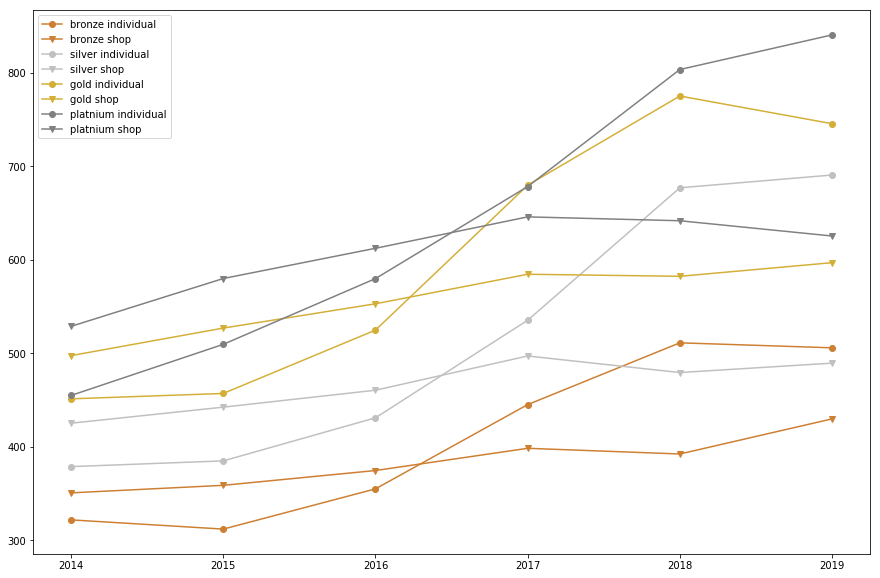

In [44]:
import matplotlib.pyplot as plt

x = naive1["Year"]
y = naive1["Bronze Ind"]
y2 = naive1["Bronze SHOP"]
y3 = naive1["Silver Ind"]
y4 = naive1["Silver SHOP"]
y5 = naive1["Gold Ind"]
y6 = naive1["Gold SHOP"]
y7 = naive1["Platinum Ind"]
y8 = naive1["Platinum SHOP"]

# D4AF37 gold
# cd7f32 bronze
# C0C0C0 silver
# 808080 platnium
# "^"

fig, ax = plt.subplots(figsize=(15,10))
plt.plot(x, y, '-o', color='#cd7f32', label='bronze individual')
plt.plot(x, y2, '-v', color='#cd7f32', label='bronze shop')
plt.plot(x, y3, '-o', color='#C0C0C0', label='silver individual')
plt.plot(x, y4, '-v', color='#C0C0C0', label='silver shop')
plt.plot(x, y5, '-o', color='#D4AF37', label='gold individual')
plt.plot(x, y6, '-v', color='#D4AF37', label='gold shop')
plt.plot(x, y7, '-o', color='#808080', label='platnium individual')
plt.plot(x, y8, '-v', color='#808080', label='platnium shop')
plt.legend()
plt.show()